In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve

## Importing and warehousing data

In [2]:
df1 = pd.read_csv(r"C:\Users\hp\Desktop\Finance_casestudy_706\Part2 - Data1.csv")
print(df1.shape)

(5000, 8)


In [3]:
df2 = pd.read_csv(r"C:\Users\hp\Desktop\Finance_casestudy_706\Part2 -Data2.csv")
print(df2.shape)

(5000, 7)


In [4]:
df = pd.merge(df1,df2,on="ID",how="inner")
print(df.shape)

(5000, 14)


In [5]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


## Data cleansing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [7]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.reset_index(inplace=True,drop=True)

In [10]:
print(df.shape)

(4980, 14)


In [11]:
#Checking duplicate values
df.ID.value_counts()[df.ID.value_counts() != 1]

Series([], Name: ID, dtype: int64)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


In [13]:
df['CustomerSince'] = np.where((df["CustomerSince"] <0 ),0,df['CustomerSince'])

## Data analysis &visualization

In [14]:
all_cols = df.columns.tolist()

In [15]:
continuous_cols =["Age","CustomerSince","HighestSpend","Mortgage","MonthlyAverageSpend"]

In [16]:
discrete_cols = [col for col in all_cols if (col not in continuous_cols)]

In [17]:
discrete_cols.remove("ID")

In [18]:
discrete_cols.remove("ZipCode")

In [19]:
print(f"There are {df.ZipCode.nunique()} unique zipcodes of different customers")

There are 467 unique zipcodes of different customers


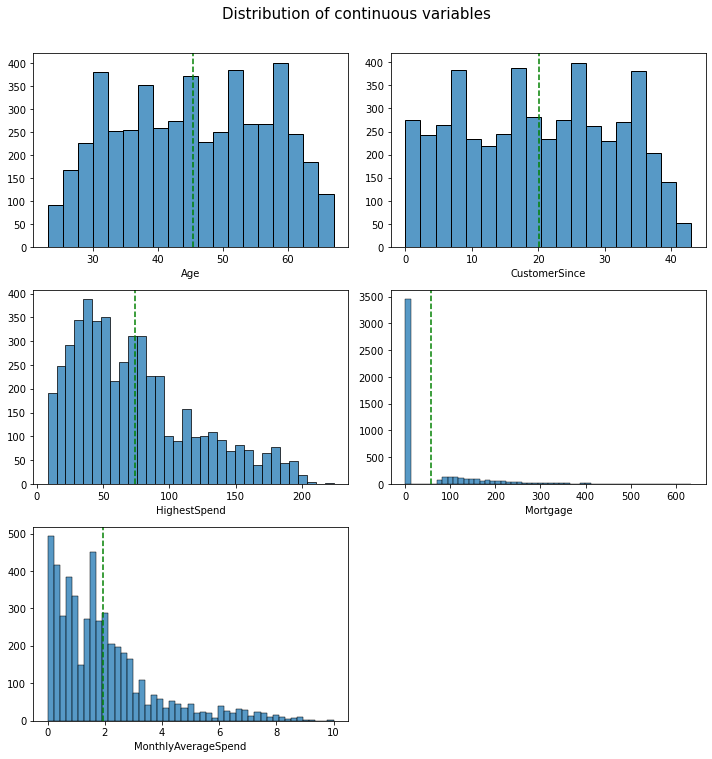

In [20]:
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of continuous variables",fontsize=15,y=1.05)

for idx,col in enumerate(continuous_cols):
    ax =plt.subplot(3,2,idx+1)
    sns.histplot(x=col,data=df,ax=ax)
    ax.axvline(df[col].mean(),linestyle="--",color="g")
    ax.set_ylabel(None)

plt.tight_layout()

In [21]:
for col in discrete_cols:
    print(df[col].value_counts(normalize=True),"\n")

1    0.294378
2    0.259639
4    0.243976
3    0.202008
Name: HiddenScore, dtype: float64 

1    0.419478
3    0.300402
2    0.280120
Name: Level, dtype: float64 

0    0.895582
1    0.104418
Name: Security, dtype: float64 

0    0.939357
1    0.060643
Name: FixedDepositAccount, dtype: float64 

1    0.597189
0    0.402811
Name: InternetBanking, dtype: float64 

0    0.705622
1    0.294378
Name: CreditCard, dtype: float64 

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64 



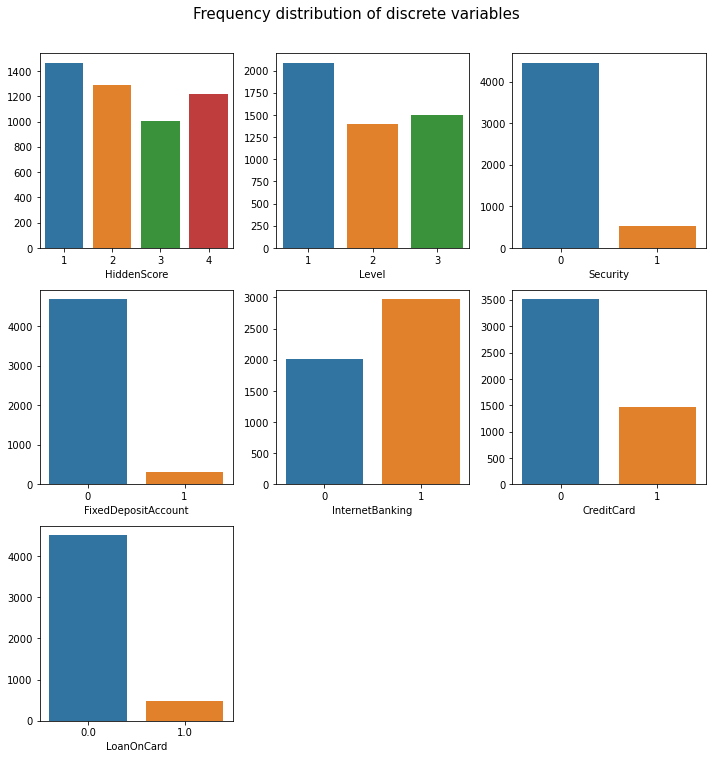

In [22]:
plt.figure(figsize=(10,10))
plt.suptitle("Frequency distribution of discrete variables",fontsize=15, y=1.05)

for idx,col in enumerate(discrete_cols):
    ax =plt.subplot(3,3,idx+1)
    sns.countplot(x=col,data=df,ax=ax)
    ax.set_ylabel(None)
    
plt.tight_layout()

In [23]:
df.groupby("Age")['MonthlyAverageSpend'].agg(['sum']).nlargest(5,"sum")

,sum
Age,
43,314.07
35,310.43
46,302.02
34,292.52
45,292.10


The age group (34-46) has the highest monthly average spend so the bank can target them to sell their credit cards

In [24]:
print(df[df["CreditCard"] ==1].groupby(["Age","CreditCard"])['MonthlyAverageSpend'].agg(['sum']).nlargest(5,"sum"))

                   sum
Age CreditCard        
46  1           137.64
45  1           104.57
32  1            87.60
58  1            87.60
36  1            87.54


In [25]:
print(df[df["CreditCard"] ==0].groupby(["Age","CreditCard"])['MonthlyAverageSpend'].agg(['sum']).nlargest(5,"sum"))

                   sum
Age CreditCard        
35  0           244.53
43  0           236.72
52  0           216.80
34  0           215.36
30  0           200.51


Customers in the age group 30 to 45 spend more each month if they don't own a credit card

In [26]:
df.groupby("Age")['FixedDepositAccount'].agg(['sum']).nlargest(5,"sum")

,sum
Age,
32,16
56,14
46,13
42,12
57,12


Customers in their 30’s invest more on FDs

CreditCard
0    6841.65
1    2817.24
Name: MonthlyAverageSpend, dtype: float64


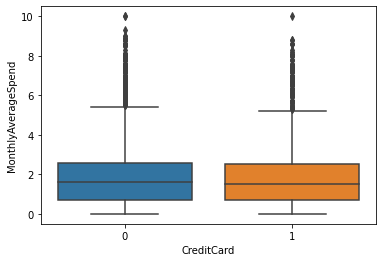

In [27]:
print(df.groupby(['CreditCard'])['MonthlyAverageSpend'].sum())
sns.boxplot(data=df,x="CreditCard",y="MonthlyAverageSpend")

Customers who don't own a credit card have the highest monthly Average Spend

CreditCard
0    259808
1    107977
Name: HighestSpend, dtype: int64


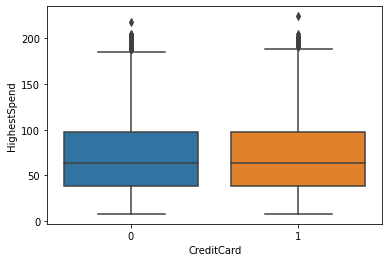

In [28]:
print(df.groupby(['CreditCard'])['HighestSpend'].sum())
sns.boxplot(data=df,x="CreditCard",y="HighestSpend")

Customers who don't have a credit card spend less amount in one transaction

FixedDepositAccount
0    8789.44
1     869.45
Name: MonthlyAverageSpend, dtype: float64


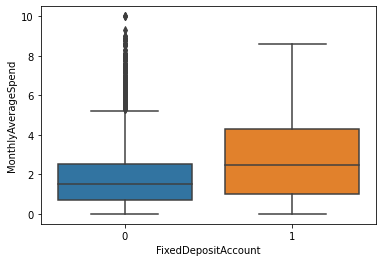

In [29]:
print(df.groupby(['FixedDepositAccount'])['MonthlyAverageSpend'].sum())
sns.boxplot(data=df,x="FixedDepositAccount",y="MonthlyAverageSpend")

Customers having an FD account tend to spend less amount in each month

In [30]:
df.groupby(['Age'])['LoanOnCard'].sum()[df.groupby(['Age'])['LoanOnCard'].sum()!=0].nlargest(5)

Age
34    18.0
30    17.0
35    16.0
36    16.0
63    16.0
Name: LoanOnCard, dtype: float64

In [31]:
df.LoanOnCard.value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

Class distribution is imbalanced

Maximum customers are of the the age group between 30-36 who have accepted the loan

In [32]:
df.groupby(["CreditCard","LoanOnCard"])["MonthlyAverageSpend"].sum()

CreditCard  LoanOnCard
0           0.0           5537.43
            1.0           1304.22
1           0.0           2246.89
            1.0            570.35
Name: MonthlyAverageSpend, dtype: float64

Customers who have credit and Loan spend less amount each month

In [33]:
df.groupby(["CreditCard","LoanOnCard"])["Security"].sum()

CreditCard  LoanOnCard
0           0.0           334
            1.0            43
1           0.0           126
            1.0            17
Name: Security, dtype: int64

Not all customers have given a security asset to the bank while taking a loan

## Data pre-processing

In [34]:
predict_val = df.drop(columns=['ID',"ZipCode","LoanOnCard"],axis=1)
target = df.loc[:,'LoanOnCard']

In [35]:
# Splitting the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(predict_val,target,test_size=0.3,random_state=44)

In [36]:
# Scaling
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,0.000000,0.000000,0.671429,0.000000,0.633,0.0,0.494327,0.0,0.0,0.0,1.0
1,0.772727,0.720930,0.223810,0.666667,0.250,0.0,0.354943,0.0,1.0,1.0,1.0
2,0.227273,0.186047,0.809524,0.666667,0.850,0.0,0.000000,1.0,1.0,1.0,0.0
3,0.727273,0.720930,0.309524,0.666667,0.267,0.0,0.354943,0.0,0.0,1.0,0.0
4,0.454545,0.441860,0.238095,0.333333,0.320,0.0,0.000000,0.0,0.0,1.0,0.0


## Model training,testing and tuning

In [37]:
# Logistic regression

lgb = LogisticRegression(random_state=100).fit(X_train,y_train)

lgb_pred = lgb.predict(X_test)
lgb_pred_prob = lgb.predict_proba(X_test)[:,1]

train_acc= accuracy_score(y_train,lgb.predict(X_train))
test_acc = accuracy_score(y_test,lgb_pred)

print("Training accuracy :",train_acc)
print("\nTesting accuracy :",test_acc)

print("\nConfusion Matrix :\n",confusion_matrix(y_test,lgb_pred))
print("\n",classification_report(y_test,lgb_pred))

fpr_lgb,tpr_lgb,thresholds_lgb = roc_curve(y_test,lgb_pred_prob)
auc_score_lgb = roc_auc_score(y_test,lgb_pred_prob)
print("AUC score :",auc_score_lgb)

Training accuracy : 0.9492254733218589

Testing accuracy : 0.9605087014725568

Confusion Matrix :
 [[1354   11]
 [  48   81]]

               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1365
         1.0       0.88      0.63      0.73       129

    accuracy                           0.96      1494
   macro avg       0.92      0.81      0.86      1494
weighted avg       0.96      0.96      0.96      1494

AUC score : 0.9541925774483914


In [38]:
# Naive Bayes

nb = MultinomialNB().fit(X_train,y_train)

nb_pred = nb.predict(X_test)
nb_pred_prob = nb.predict_proba(X_test)[:,1]

train_acc_nb= accuracy_score(y_train,nb.predict(X_train))
test_acc_nb = accuracy_score(y_test,nb_pred)

print("Training accuracy :",train_acc_nb)
print("\nTesting accuracy :",test_acc_nb)

print("\nConfusion Matrix :\n",confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred,zero_division=1))

fpr_nb,tpr_nb,thresholds_nb = roc_curve(y_test,nb_pred_prob)
auc_score_nb = roc_auc_score(y_test,nb_pred_prob)
print("AUC score :",auc_score_nb)

Training accuracy : 0.8998852553069421

Testing accuracy : 0.9149933065595717

Confusion Matrix :
 [[1365    0]
 [ 127    2]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96      1365
         1.0       1.00      0.02      0.03       129

    accuracy                           0.91      1494
   macro avg       0.96      0.51      0.49      1494
weighted avg       0.92      0.91      0.88      1494

AUC score : 0.8601925206576368


In [39]:
#Random Forest

rf = RandomForestClassifier(n_estimators=1000,bootstrap=True,random_state=44).fit(X_train,y_train)

rf_pred = rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)[:,1]

train_acc_rf= accuracy_score(y_train,rf.predict(X_train))
test_acc_rf = accuracy_score(y_test,rf_pred)

print("Training accuracy :",train_acc_rf)
print("\nTesting accuracy :",test_acc_rf)

print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf_pred_prob)
auc_score_rf = roc_auc_score(y_test,rf_pred_prob)
print("AUC score :",auc_score_rf)

Training accuracy : 1.0

Testing accuracy : 0.9906291834002677

Confusion Matrix :
 [[1363    2]
 [  12  117]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1365
         1.0       0.98      0.91      0.94       129

    accuracy                           0.99      1494
   macro avg       0.99      0.95      0.97      1494
weighted avg       0.99      0.99      0.99      1494

AUC score : 0.9985291194593521


• Precision is the number of correct labels that were predicted by the model.

• Logistic model and naive bayes has good precsion for classifying both classes i.e class 0 and class 1

• Recall is the number of labels, out of the correct labels, that were successfully predicted.The recall cares only about how the positive samples are classified. This is independent of how the negative samples are classified

• Precision and Recall have an inverse relation

• Here, Logistic model has good recall score to successfully classify 0’s and 1’s but naive bayes fails to successfully classify the labels

• f1-score is the balance between precision and recall.

• Support is the total number of samples present in class 0 and class 1

In this scenario we should consider Precision as our evaluation metric because we need to correctly
identify the potential customers who will accept the loan which will help in maximizing the business
profit

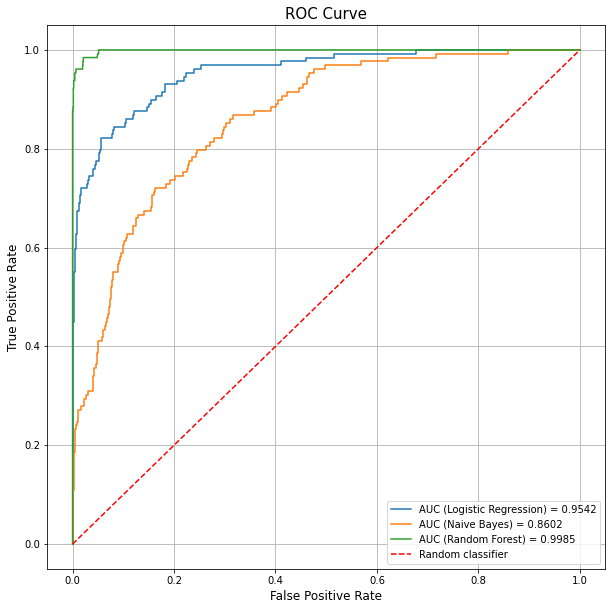

In [40]:
plt.figure(figsize=(10,10))
plt.plot(fpr_lgb, tpr_lgb, label=f'AUC (Logistic Regression) = {auc_score_lgb:0.4}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes) = {auc_score_nb:.4f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {auc_score_rf:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label="Random classifier")
plt.title('ROC Curve', size=15)
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.grid()
plt.legend()

Choosing the Random Forest model because:
1. It is outperforming all the previous models in terms of classifying labels.
2. This model has less False positives and False negatives compared to other models.
3. It has the maximum AUC 0.999 which is almost close to 1

In our data we have an imbalance in the class distribution of target variable (LoanOnCard),so
we should prefer a model with AUC close to 1


## Conclusion

Data can have more samples of class 1 in the loan variable so that the distribution is balanced